# About Dataset

<font color="Purple" size=+2 face="Comic Sans MS"><div style="text-align: justify">
    Machine Predictive Maintenance Classification Dataset </font>
<font color="blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">- Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge. </font>
<font color="blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">_ The dataset consists of 10 000 data points stored as rows with 14 features in columns
     </font>
* UID: unique identifier ranging from 1 to 10000
* productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
* air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
* process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
* rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
* torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
* tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.
* Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.
* Target : Failure or Not
* Failure Type : Type of Failure




In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn
patch_sklearn()

import warnings
warnings.filterwarnings("ignore")
#Default theme
sns.set_theme(palette='tab10',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
df=pd.read_csv("maintenance.csv")
df = df.drop(["UDI","Product ID"],axis=1)
df.tail(3)

Type  Air temperature [K]  Process temperature [K]  \
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
9997   No Failure  
9998   No Failure  
9999   No Failure

In [4]:
## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ] 

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [5]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

Type  Air temperature [°C]  Process temperature [°C]  \
2407    M                 26.95                     36.45   
6728    L                 29.35                     38.75   
1027    M                 24.15                     35.25   
6085    L                 28.75                     38.45   
3416    L                 29.35                     38.35   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
2407                    1499         45.1              185       0   
6728                    1891         23.2              122       0   
1027                    1335         50.5               48       0   
6085                    1538         36.7                3       0   
3416                    1435         44.6              135       0   

     Failure Type  Temperature difference [°C]  
2407   No Failure                          9.5  
6728   No Failure                          9.4  
1027   No Failure                         11.1  
6085   No Failure                          9.7  
3416   No Failure                          9.0

In [11]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric 

Air temperature [°C]  Process temperature [°C]  Rotational speed [rpm]  \
0                    25.95                     36.45                    1551   
1                    26.05                     36.55                    1408   
2                    25.95                     36.35                    1498   
3                    26.05                     36.45                    1433   
4                    26.05                     36.55                    1408   
5                    25.95                     36.45                    1425   
6                    25.95                     36.45                    1558   
7                    25.95                     36.45                    1527   
8                    26.15                     36.55                    1667   
9                    26.35                     36.85                    1741   
10                   26.25                     36.75                    1782   
11                   26.45                     36.95                    1423   
12                   26.45                     36.95                    1339   
13                   26.45                     37.05                    1742   
14                   26.45                     37.05                    2035   
15                   26.45                     37.05                    1542   
16                   26.45                     37.05                    1311   
17                   26.55                     37.05                    1410   
18                   26.65                     37.05                    1306   
19                   26.75                     37.15                    1632   
20                   26.75                     37.15                    1375   
21                   26.65                     37.15                    1450   
22                   26.75                     37.15                    1581   
23                   26.85                     37.25                    1758   
24                   26.85                     37.25                    1561   
25                   26.85                     37.35                    1861   
26                   26.95                     37.35                    1512   
27                   26.95                     37.25                    1811   
28                   26.95                     37.25                    1439   
29                   26.85                     37.25                    1693   
30                   26.95                     37.35                    1339   
31                   26.85                     37.25                    1798   
32                   26.85                     37.25                    1419   
33                   26.75                     37.15                    1665   
34                   26.65                     36.95                    1559   
35                   26.65                     37.05                    1452   
36                   26.75                     37.05                    1581   
37                   26.65                     36.95                    1439   
38                   26.75                     37.05                    1379   
39                   26.65                     36.95                    1350   
40                   26.65                     36.95                    1362   
41                   26.65                     36.95                    1368   
42                   26.65                     36.95                    1368   
43                   26.65                     37.05                    1372   
44                   26.65                     36.95                    1472   
45                   26.65                     36.95                    1489   
46                   26.55                     36.85                    1843   
47                   26.65                     36.95                    1418   
48                   26.65                     37.05                    1425   
49    

In [6]:
display(df.shape)
display(df.size)

(10000, 9)

90000

In [7]:
df.isna().sum()

Type                           0
Air temperature [°C]           0
Process temperature [°C]       0
Rotational speed [rpm]         0
Torque [Nm]                    0
Tool wear [min]                0
Target                         0
Failure Type                   0
Temperature difference [°C]    0
dtype: int64

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.2+ KB


In [9]:
df.describe().style.background_gradient(cmap="magma")

<font color="red" size=+3 face="Comic Sans MS"><div style="text-align: justify">Explorfatory Data Analysis </font>

<font color="green" size=+2 face="Comic Sans MS"><div style="text-align: justify">1_ explore the qualitative variabels  </font>

In [15]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts()) 
    print("****"*8)

L    6000
M    2997
H    1003
Name: Type, dtype: int64
********************************
0    9661
1     339
Name: Target, dtype: int64
********************************
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64
********************************


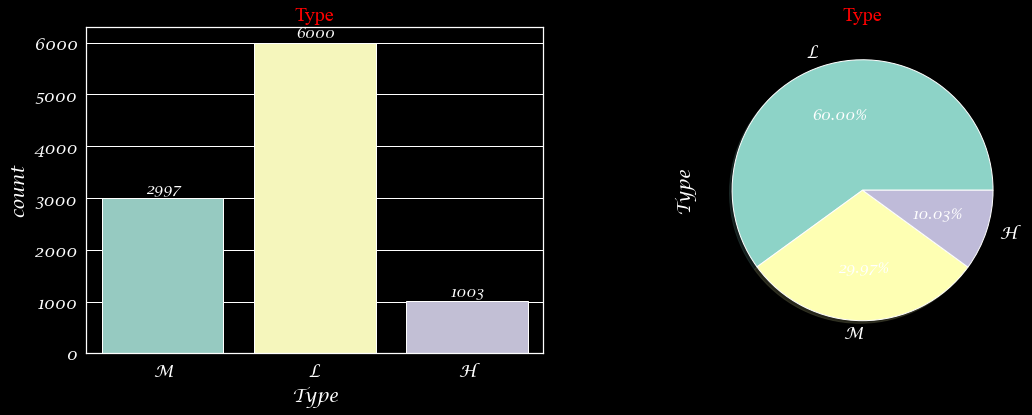

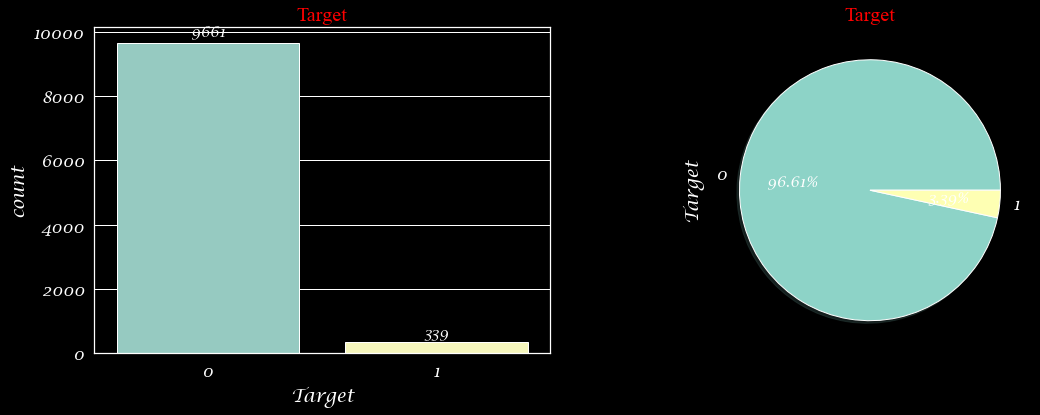

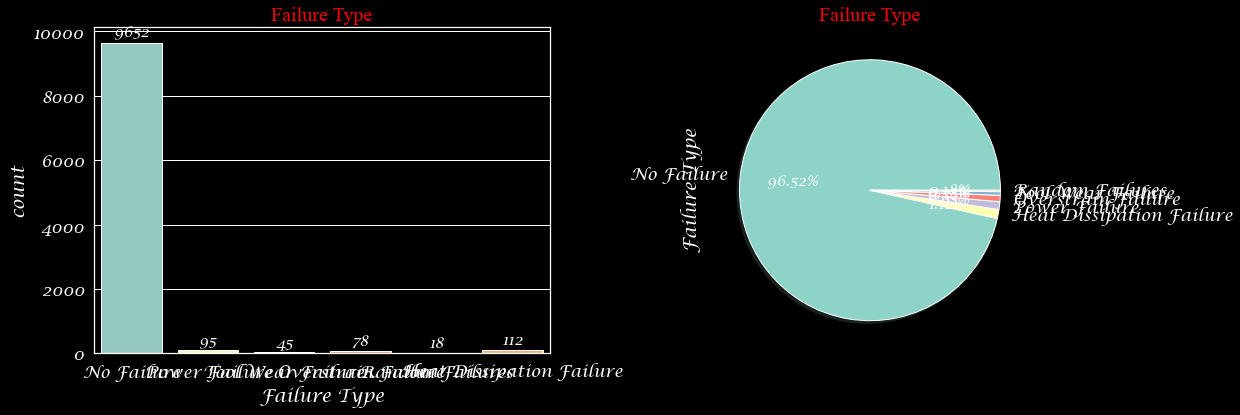

In [54]:
for column in ['Type','Target','Failure Type'] :
    ax = plt.figure(figsize=(18,6))
    ax = plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=df)
    ax.bar_label(ax.containers[0])
    plt.title(column, fontsize=20,color='Red',font='Times New Roman')
    ax =plt.subplot(1,2,2)
    ax=df[column].value_counts().plot.pie(autopct='%1.2f%%',shadow=True);
    ax.set_title(label = column, fontsize = 20,color='Red',font='Times New Roman');

<font color="green" size=+2 face="Comic Sans MS"><div style="text-align: justify"> 2_ explore the quantitave variabeles </font>

<font color="Brown" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">a - Hypothesis testing on the distribution of columns. </font>

<font color="Black" size=+2 face="Comic Sans MS"><div style="text-align: justify">HYPOTHESIS : </font>
<font color="blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">=========> H0 : the variable is normally destributed </font>
<font color="Blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">=========> H1 : the variable is not normally destributed </font>

 <font color="Black" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">* Shapiro-Wilk test:  </font>
 <font color="Blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">=====> _If the p-value is greater than 0.05: the column to be normally distributed.  </font>
<font color="Blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> =====>  _ Otherwise, it is not </font>
    
<font color="Black" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> The p-value is the probability of accepting H1 and rejecting H0 with 0.005 as the threshold </font>

<font color="Brown" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> b_ hypothesis evaluation : </font>

In [10]:
import pandas as pd
from scipy.stats import shapiro
data = df.drop(['Type','Failure Type','Target'], axis=1)
# Perform Shapiro-Wilk test for normality
for column in data.columns:
    stat, p = shapiro(data[column])
    if p > 0.05:
        print(f"{column} is normally distributed (p={p:.3f})")
        print('So H1 should be rejected,and H0 should be rejected')
    else:
        print(f"{column} is not normally distributed (p={p:.3f})")
        print('So H0 should be rejected,and H1 should be rejected')
    print('*************************************************************************')


Air temperature [°C] is not normally distributed (p=0.000)
So H0 should be rejected,and H1 should be rejected
*************************************************************************
Process temperature [°C] is not normally distributed (p=0.000)
So H0 should be rejected,and H1 should be rejected
*************************************************************************
Rotational speed [rpm] is not normally distributed (p=0.000)
So H0 should be rejected,and H1 should be rejected
*************************************************************************
Torque [Nm] is normally distributed (p=0.382)
So H1 should be rejected,and H0 should be rejected
*************************************************************************
Tool wear [min] is not normally distributed (p=0.000)
So H0 should be rejected,and H1 should be rejected
*************************************************************************
Temperature difference [°C] is not normally distributed (p=0.000)
So H0 should be rejected,a

<font color="Brown" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">c_ Distribution visualization : </font>

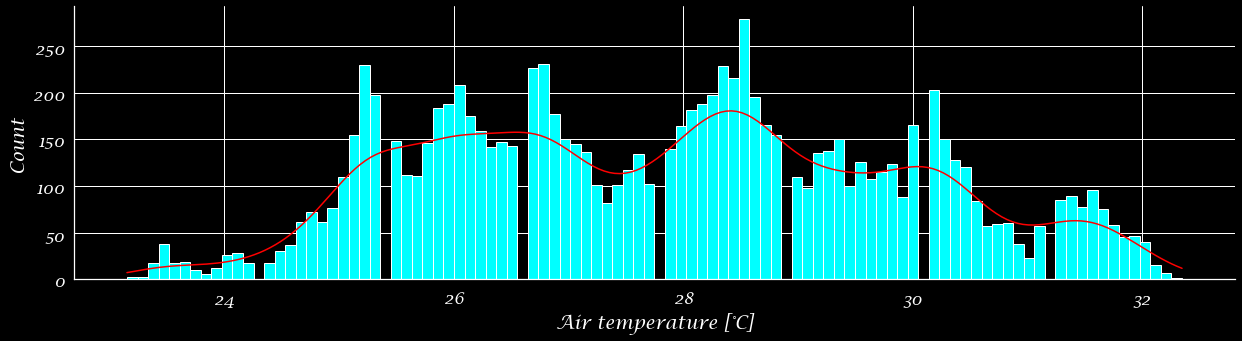

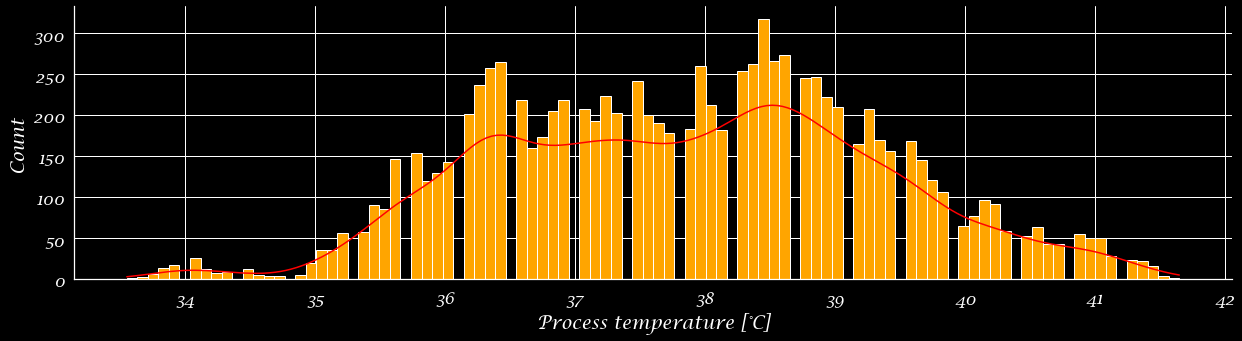

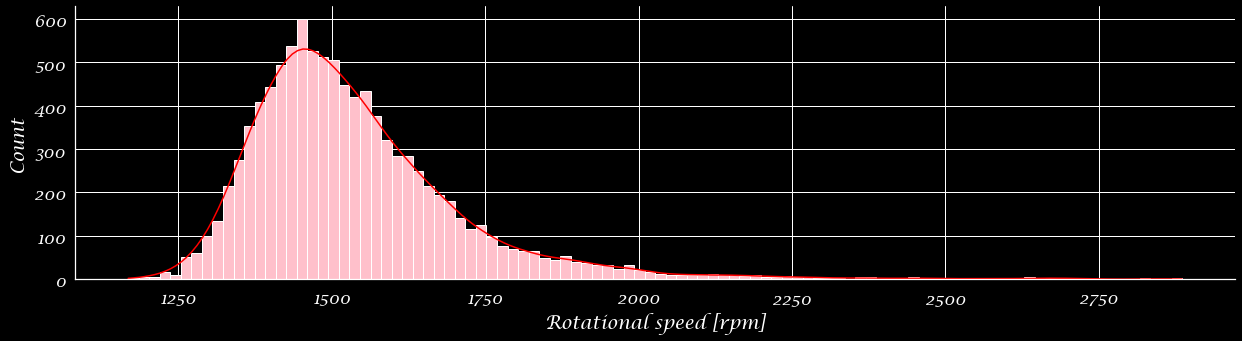

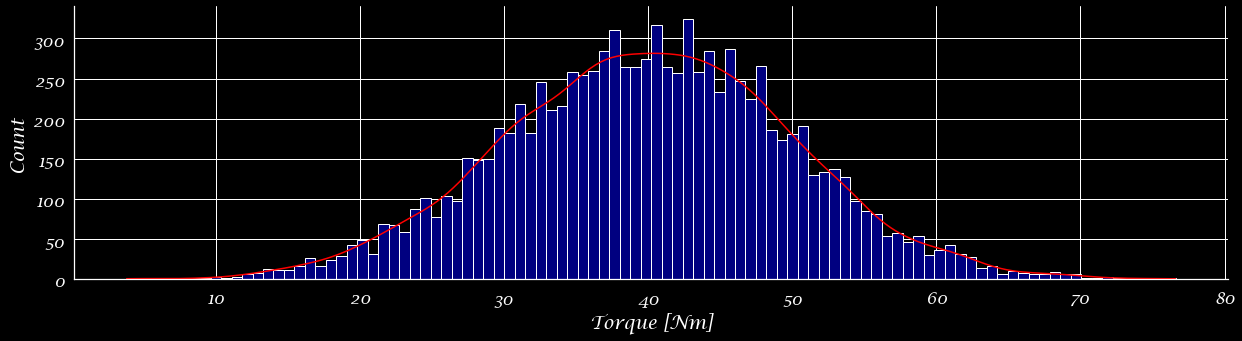

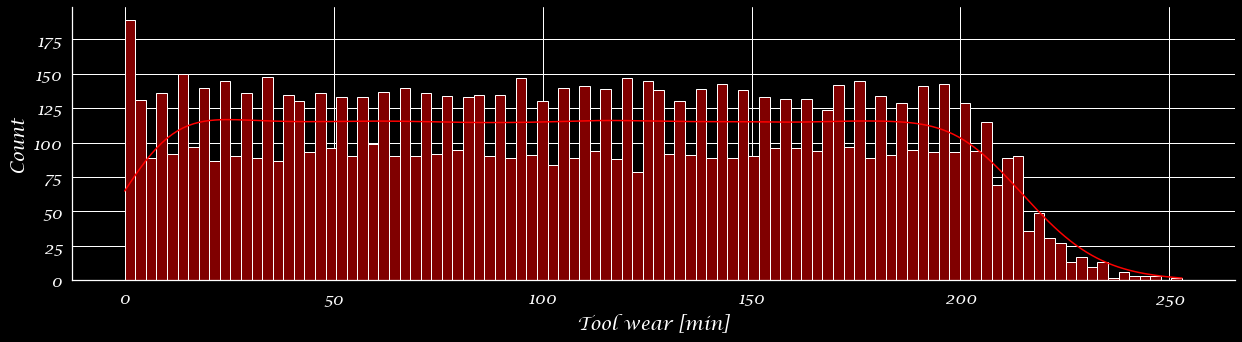

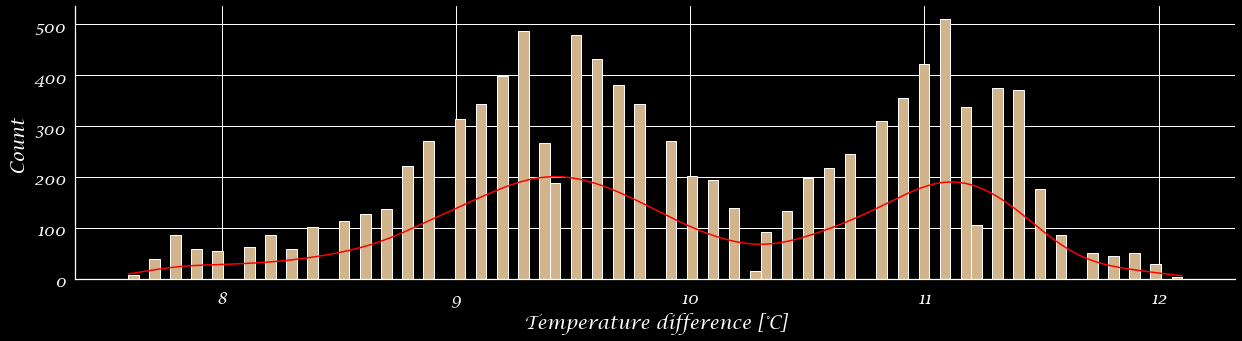

In [13]:
colors =['cyan','orange','pink' , 'navy','maroon' , 'tan','blue','g','yellow']#facecolor = "DeepPink"
i=0
for column in df.drop(['Type','Failure Type','Target'], axis=1).columns :
    sns.displot(data=df, x=column, kde=True, bins = 100,color = 'red' , facecolor =colors[i],height = 5, aspect = 3.5);
    i+=1

<font color="green" size=+2 face="Comic Sans MS"><div style="text-align: justify"> 3_ Explore the relationship between variables  </font>

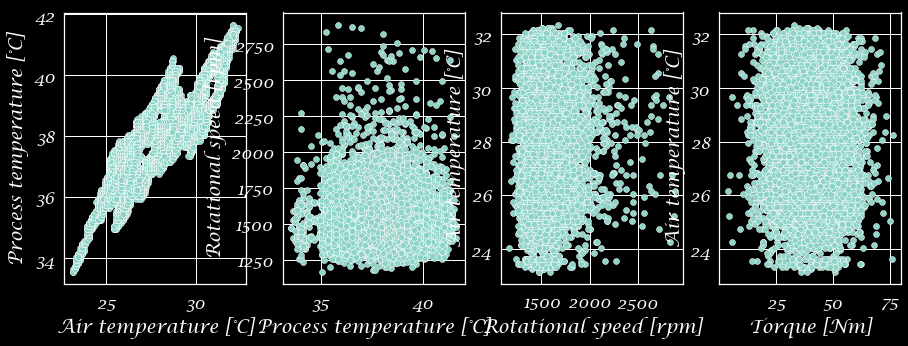

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=4, figsize=(15,5))


# Plot the scatterplots in each subplot
sns.scatterplot(data=df, x='Air temperature [°C]', y='Process temperature [°C]', ax=axs[0])
sns.scatterplot(data=df, x='Process temperature [°C]', y='Rotational speed [rpm]', ax=axs[1])
sns.scatterplot(data=df, x='Rotational speed [rpm]', y='Air temperature [°C]', ax=axs[2])
sns.scatterplot(data=df, x='Torque [Nm]', y='Air temperature [°C]', ax=axs[3])

# Display the plot
plt.show()

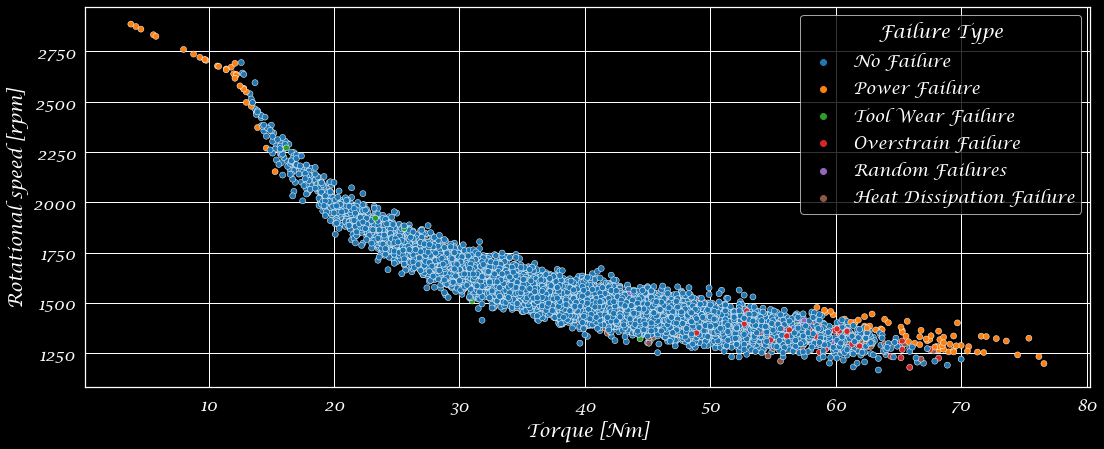

In [61]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

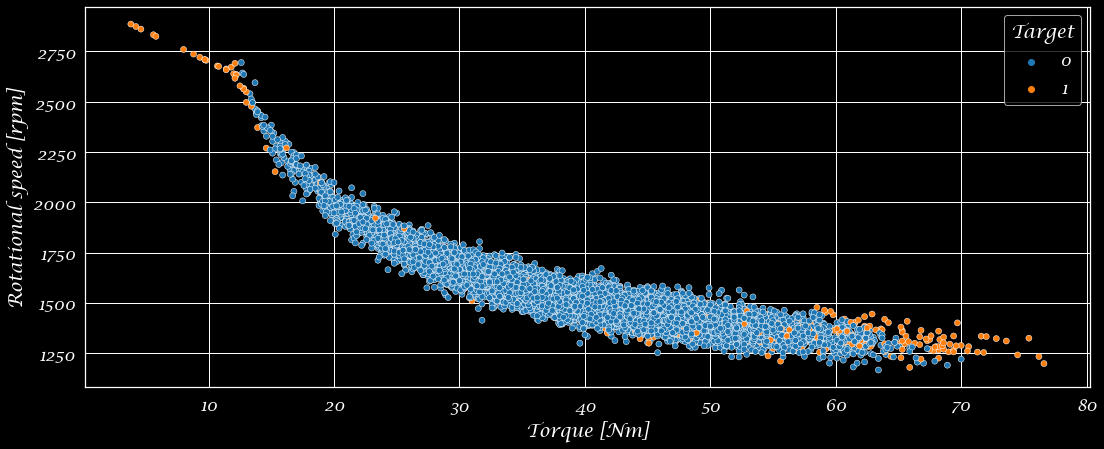

In [20]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

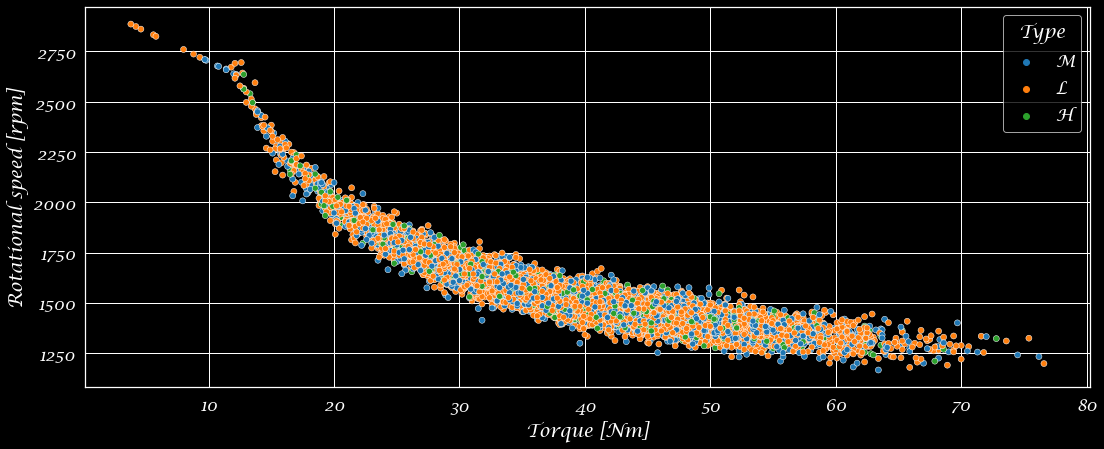

In [21]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

<font color="green" size=+2 face="Comic Sans MS"><div style="text-align: justify"> 4_ Explore the outlires : </font>

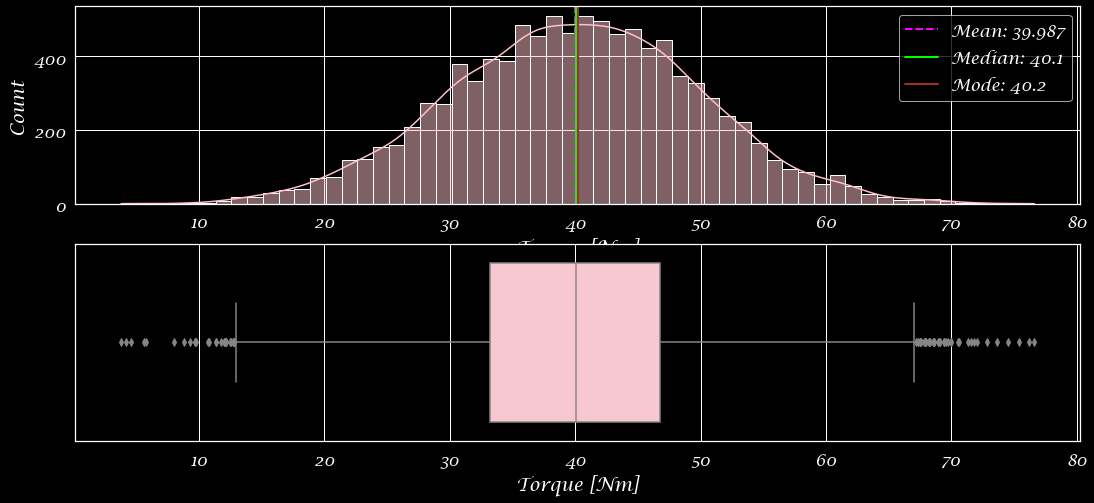

In [24]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='pink')

    ax[0].axvline(x = df[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='pink')
    
    plt.show()

plot_hist('Torque [Nm]')

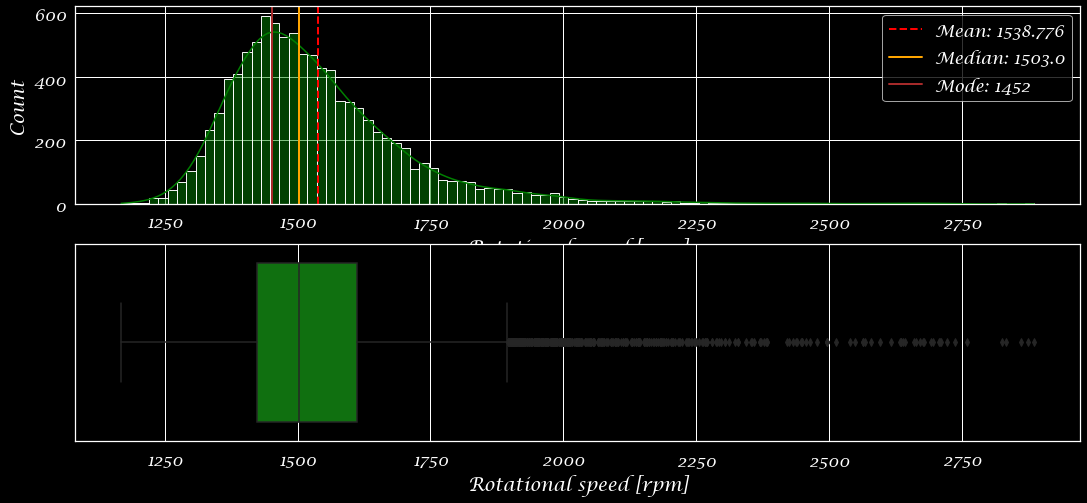

In [25]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Rotational speed [rpm]')

<font color="Blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">identifie the outliers based on whether their absolute Z-score is greater than the threshold: observations that are more than three standard deviations away from the mean are considered outliers. </font>
    
  <font color="Blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">  z = (x - μ) / σ</font>
    
    

In [15]:
import numpy as np
from scipy import stats
data = df['Torque [Nm]']
z_scores = stats.zscore(data)
threshold = 3
outliers = np.abs(z_scores) > threshold
print(np.where(outliers)[0])

[  50  463  603  847  880 1095 1324 1391 1784 3000 3369 3867 4296 4936
 5334 5394 5615 5706 6525 6612 7569 7763 7997 8582 9084]


In [ ]:
# sns.pairplot(df,hue = "Failure Type");

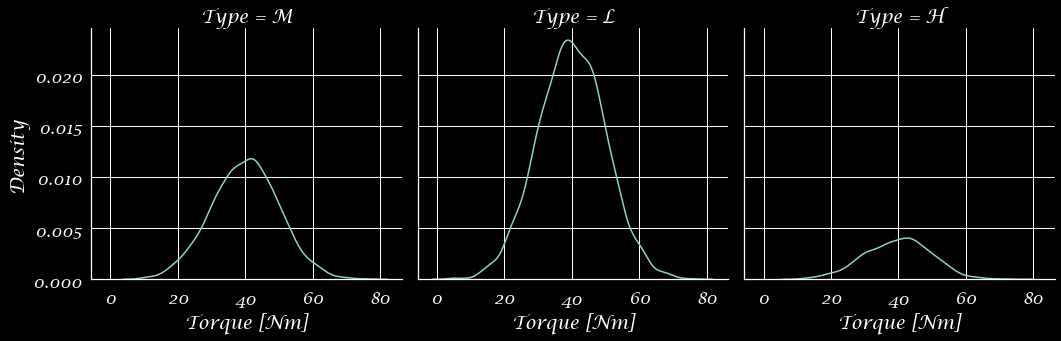

In [26]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde");

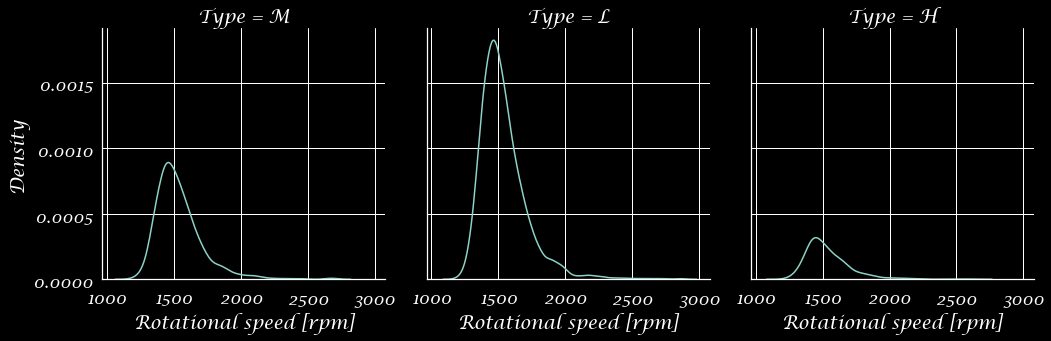

In [27]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

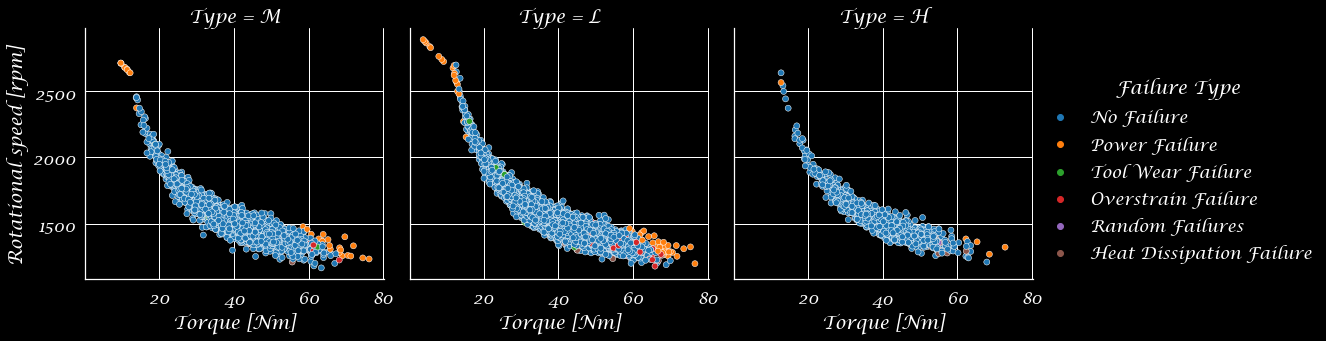

In [28]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');

<font color="red" size=+3 face="Comic Sans MS"><div style="text-align: justify"> Data preprocessing </font>
    

<font color="green" size=+2 face="Comic Sans MS"><div style="text-align: justify"> 1_ categorical variable encoding: </font>

<font color="blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> The target variable can be considered as the <b>type of failure</b> for clustering and <b>Target</b> for the classification . </font>

In [65]:
df.head(3)

Type  Air temperature [°C]  Process temperature [°C]  \
0    M                 25.95                     36.45   
1    L                 26.05                     36.55   
2    L                 25.95                     36.35   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  \
0                    1551         42.8                0       0   No Failure   
1                    1408         46.3                3       0   No Failure   
2                    1498         49.4                5       0   No Failure   

   Temperature difference [°C]  
0                         10.5  
1                         10.5  
2                         10.4

<font color="blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">- for categorical variables we can use category_encoders </font>

In [1]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

NameError: name 'df' is not defined

In [67]:
df['Failure Type'].unique()

array([1, 2, 3, 4, 5, 6])

In [68]:
df['Type'].unique()

array([1, 2, 3])

<font color="green" size=+2 face="Comic Sans MS"><div style="text-align: justify"> 2_ correlation metrix : </font>

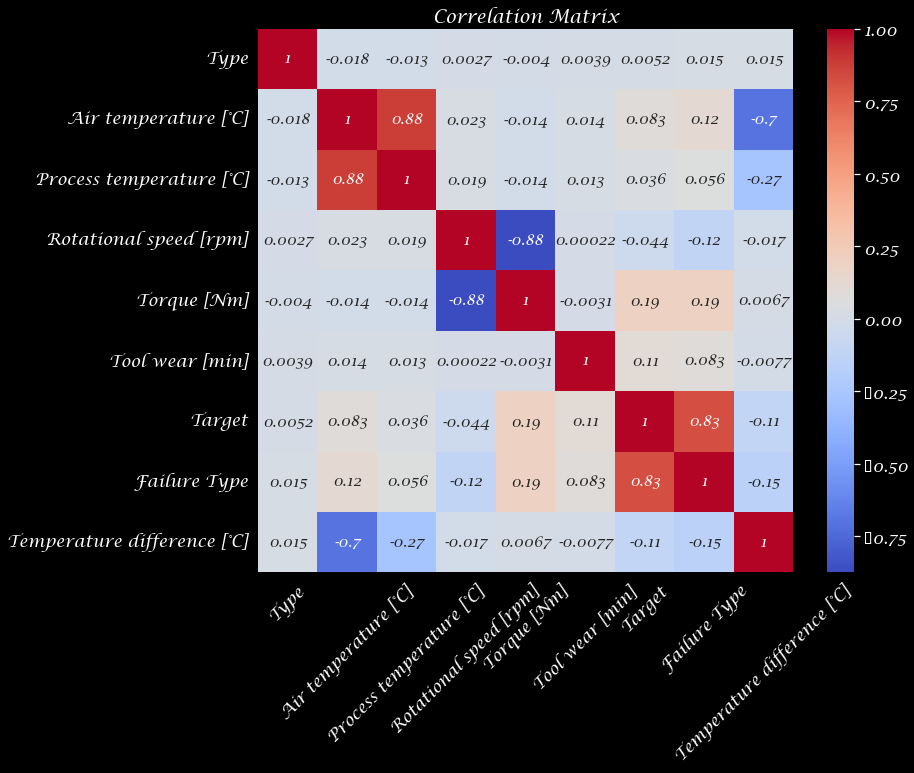

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()


<font color="green" size=+2 face="Comic Sans MS"><div style="text-align: justify">3_ Feature Selection </font>
    

In [7]:
X = df.drop(['Failure Type','Target'], axis=1)
y = df['Target']

In [8]:
from sklearn.model_selection import train_test_split
def split(X):
    y = df['Target']
    return train_test_split( X, y,test_size=0.2,random_state=21)

<font color="blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> <b color="red" size=+1.85 >Univariate Feature Selection:</b> This method selects the best features based on univariate statistical tests like chi-squared or ANOVA. This method is useful when the relationship between features and the target variable is linear and simple. It can be applied when there are many features and a subset of features is required.

<font color="blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">  <b color="red" size=+1.85 >Recursive Feature Elimination (RFE): </b>This method recursively removes the least important features based on model coefficients until the desired number of features is reached. This method is useful when the relationship between features and the target variable is non-linear and complex. It can be applied when there are many features and a subset of features is required.
 </font>
<font color="blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> <b color="red" size=+1.85 > Sequential Feature Selection:</b> This method selects features in a forward or backward manner based on model performance. It can be applied when the relationship between features and the target variable is non-linear and complex. This method can be applied when there are many features and a subset of features is required.
</font>
<font color="blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">  <b color="red" size=+1.85 > Principal Component Analysis (PCA):</b> This method transforms the data into a lower-dimensional space while retaining the maximum amount of variance. It is useful when there are many correlated features and a subset of features is required. This method can also be used to reduce the dimensionality of the data for visualization purposes.
 </font>
<font color="blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify">  <b color="red" size=+1.85 >Feature Importance:</b> This method determines the importance of each feature by calculating the reduction in model performance when a feature is removed. It is useful when a model has already been trained and feature importance needs to be determined. This method can be applied to any model that has a built-in feature importance attribute.</font>
 </font>


<font color="Purple" size=+2 face="Comic Sans MS"><div style="text-align: justify"> .      a_ SelectKBest : </font>
   <font color="blue" size=+1 face="Comic Sans MS"><div style="text-align: justify">  ===> chi-squared test: used for categorical data</font>
<font color="blue" size=+1 face="Comic Sans MS"><div style="text-align: justify">     ===> ANOVA F-test: used for continuous data  explain theme </font>

In [9]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
def selectKBest(data):
    try : 
        X = data.drop(['Failure Type','Target'], axis=1)
    except :
        X = data.drop(['Target'], axis=1)
    y = data['Target']
    cont_cols = ['Type', 'Air temperature [°C]', 'Process temperature [°C]',
           'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Temperature difference [°C]']
    selector = SelectKBest(score_func=f_regression, k=4)
    pipeline = make_pipeline(StandardScaler(), selector, LinearRegression())
    pipeline.fit(X[cont_cols], y)
    selected_features = X[cont_cols].columns[selector.get_support()]
    print(list(selected_features))
    return  split(df[list(selected_features)])
X_train,X_test,y_train,y_test =selectKBest(df)

['Air temperature [°C]', 'Torque [Nm]', 'Tool wear [min]', 'Temperature difference [°C]']


 <font color="Purple" size=+2 face="Comic Sans MS"><div style="text-align: justify"> .      b_ Univariate Feature Selection : </font>

In [64]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif


X = df.drop(['Failure Type','Target'], axis=1)
y = df['Target']
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
selected_names = X.columns[selected_indices]
importance_scores = selector.scores_[selected_indices]
importance_df = pd.DataFrame({'feature': selected_names, 'importance': importance_scores})
importance_df = importance_df.sort_values('importance', ascending=False)
print(importance_df)
X_train,X_test,y_train,y_test = split(df[list(selected_names)])

                       feature  importance
2                  Torque [Nm]  379.867723
4  Temperature difference [°C]  126.265779
3              Tool wear [min]  112.421077
0         Air temperature [°C]   68.608385
1       Rotational speed [rpm]   19.559690


<font color="Purple" size=+2 face="Comic Sans MS"><div style="text-align: justify"> .      c_ Recursive feature elimination  : </font>

In [65]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

features= df.drop(['Failure Type','Target'], axis=1)
target = df['Target']
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=4)
rfe.fit(features, target)
selected_features = features.columns[rfe.support_]
print(list(selected_features))
X_train,X_test,y_train,y_test = split(df[list(selected_features)])

['Air temperature [°C]', 'Process temperature [°C]', 'Torque [Nm]', 'Temperature difference [°C]']


<font color="Purple" size=+2 face="Comic Sans MS"><div style="text-align: justify"> .      d_Feature Selection Sequential Feature Selection (SFS) : </font>

<font color="green" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> .      a_ general case :
: </font>

<font color="blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> . generally you can use any algorithms to process the feature selection </font>

<font color="green" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> .      a_ based on RidgeClassifier  : </font>

<font color="black" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> the RidgeClassifier model and performs forward feature selection using cross-validation (cv = split) to select the top 5 features. In forward selection, the algorithm starts with an empty set of features and adds one feature at a time, selecting the feature that results in the best model performance. </font>

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier

rr = RidgeClassifier(alpha = 1)
split = TimeSeriesSplit(n_splits = 3)
sfs = SequentialFeatureSelector(rr,n_features_to_select=5,direction = "forward",cv = split)

<font color="green" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> .      a_ RandomForestClassifier  : </font>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Perform feature selection using SequentialFeatureSelector
sfs = SequentialFeatureSelector(RandomForestClassifier(), n_features_to_select=5)
sfs.fit(df_scaled, df_scaled['Target'])

In [ ]:
selected_features_idx = sfs.get_support(indices=True)

# Get the selected feature names
selected_features_names = df.columns[selected_features_idx]
print(selected_features_names)
selected_features_names1 = list(selected_features_names)

<font color="RED" size=+3 face="Comic Sans MS"><div style="text-align: justify"> . </font>

<font color="RED" size=+3 face="Comic Sans MS"><div style="text-align: justify"> classification :the best model construction  </font>

<font color="green" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> 1_ Build the model before balancing the data </font>

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; "> a_ Logistic Regression 🎄</span>

Training Accuracy    : 96.95 %
Model Accuracy Score : 96.3 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1923
           1       1.00      0.04      0.08        77

    accuracy                           0.96      2000
   macro avg       0.98      0.52      0.53      2000
weighted avg       0.96      0.96      0.95      2000

--------------------------------------------------------


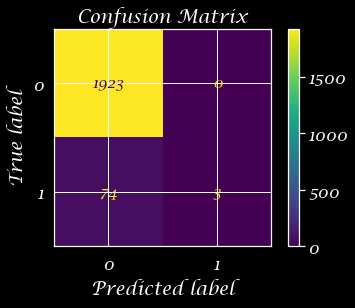

In [94]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">b_ Decision Tree Classifier 🎄🎄</span>

Training Accuracy    : 100.0 %
Model Accuracy Score : 96.7 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1923
           1       0.57      0.56      0.57        77

    accuracy                           0.97      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


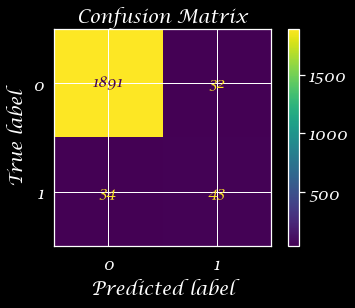

In [95]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">c_ Random Forest Classifier 🎄🎄🎄</span>

Training Accuracy    : 99.9 %
Model Accuracy Score : 97.4 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1923
           1       0.80      0.43      0.56        77

    accuracy                           0.97      2000
   macro avg       0.89      0.71      0.77      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


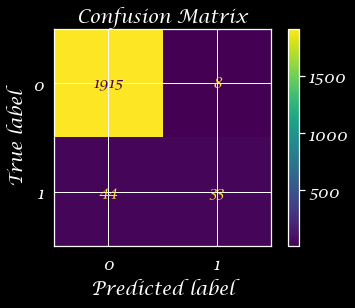

In [96]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">d_ SVM 📚</span>

Training Accuracy    : 96.72 %
Model Accuracy Score : 96.15 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1923
           1       0.00      0.00      0.00        77

    accuracy                           0.96      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.92      0.96      0.94      2000

--------------------------------------------------------


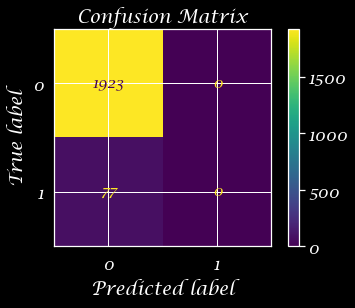

In [97]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, X_test, y_test);
plt.title('Confusion Matrix');

<font color="green" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> . </font>

<font color="green" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> 2_ Build the model after balancing the data </font>

In [82]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df.drop(['Failure Type','Target'], axis=1)
y = df['Target']

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print class distribution before and after oversampling
print("Before oversampling:")
print(y.value_counts())

print("After oversampling:")
print(y_resampled.value_counts())
X['Target'] = y_resampled
X_train,X_test,y_train,y_test =selectKBest(X)


Before oversampling:
0    9661
1     339
Name: Target, dtype: int64
After oversampling:
0    9661
1    9661
Name: Target, dtype: int64
['Air temperature [°C]', 'Torque [Nm]', 'Tool wear [min]', 'Temperature difference [°C]']


In [83]:
from sklearn.datasets import load_iris, load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import pandas as pd
import numpy as np




classifiers =classifiers = {
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB(),    
    'Gradient Boosting': GradientBoostingClassifier(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    'BaggingClassifier': BaggingClassifier(),
    'Perceptron': Perceptron(),

    'AdaBoost': AdaBoostClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Linear SVM': LinearSVC(),
    'Stochastic Gradient Descent': SGDClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'LGBMClassifier': LGBMClassifier(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'MLPClassifier': MLPClassifier(),
    'GaussianProcessClassifier': GaussianProcessClassifier(),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'SVC': SVC(kernel='rbf'),
    'NearestCentroid': NearestCentroid(),
    'GaussianMixture': GaussianMixture(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

hyperparameters = {
    "GaussianNB": {},
    "MultinomialNB": {"alpha": [0.1, 0.5, 1.0, 2.0]},
    "BernoulliNB": {"alpha": [0.1, 0.5, 1.0, 2.0]},
    "DecisionTree": {"max_depth": [2, 4, 6, 8]},
    "RandomForest": {"n_estimators": [100, 200, 300], "max_depth": [2, 4, 6, 8]},
    "ExtraTrees": {"n_estimators": [100, 200, 300], "max_depth": [2, 4, 6, 8]},
    "KNN": {"n_neighbors": [3, 5, 7, 9]}, 
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Ridge Classifier': {'alpha': [0.1, 1, 10]},
    'SGD Classifier': {'loss': ['hinge', 'log'], 'alpha': [0.0001, 0.001, 0.01]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Linear SVM': {'C': [0.1, 1, 10]},
    'Stochastic Gradient Descent': {'loss': ['hinge', 'log'], 'alpha': [0.0001, 0.001, 0.01]},
    'Perceptron': {'penalty': [None, 'l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01]},
    'Passive Aggressive Classifier': {'C': [0.1, 1, 10]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'LGBMClassifier': {'num_leaves': [10, 20, 30],'max_depth': [5, 10, 15],'learning_rate': [0.05, 0.1, 0.15],'n_estimators': [100, 200, 300]},
    'QuadraticDiscriminantAnalysis': {'reg_param': [0.0, 0.5, 1.0]},
    'LinearDiscriminantAnalysis': {'solver': ['lsqr', 'eigen']},
    'MLPClassifier': {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],'activation': ['tanh', 'relu'],'solver': ['sgd', 'adam'],'alpha': [0.0001, 0.05],'learning_rate': ['constant','adaptive']},
    'GaussianProcessClassifier': {'max_iter_predict': [100, 200, 300],'n_restarts_optimizer': [0, 5, 10]},
    'BaggingClassifier': {'n_estimators': [10, 50, 100],'max_samples': [0.5, 1.0],'max_features': [0.5, 1.0],'bootstrap': [True, False]},
    'HistGradientBoostingClassifier': {'learning_rate': [0.05, 0.1, 0.15],'max_iter': [100, 200, 300],'max_depth': [5, 10, 15],'min_samples_leaf': [1, 2, 4],'l2_regularization': [0.0, 0.1, 0.2]},
    'SVC': {'C': [0.1, 1, 10],'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma': ['scale', 'auto']},
    'NearestCentroid': {'metric': ['euclidean', 'manhattan']},
    'GaussianMixture': {'n_components': [2, 3, 4],'covariance_type': ['full', 'tied', 'diag', 'spherical']},
    "LGBMClassifier": {"boosting_type": ["gbdt", "dart"],"num_leaves": [31, 63, 127],"learning_rate": [0.05, 0.1, 0.2],"n_estimators": [50, 100, 200]},   
    "QuadraticDiscriminantAnalysis": {"reg_param": [0.0, 0.1, 0.5, 1.0]},
    "LinearDiscriminantAnalysis": {"solver": ["lsqr", "eigen"]},
    "MLPClassifier": {"hidden_layer_sizes": [(100,), (50,50), (20,20,20)],"activation": ["relu", "tanh", "logistic"],"learning_rate_init": [0.001, 0.01, 0.1]},
    "BaggingClassifier": {"n_estimators": [10, 50, 100],"max_samples": [0.5, 1.0],"max_features": [0.5, 1.0]},
    "HistGradientBoostingClassifier": {"loss": ["auto", "binary_crossentropy"],"max_depth": [10, 20, 30],"learning_rate": [0.01, 0.1, 1.0],"max_iter": [50, 100, 200]},
    "SVC": {"C": [0.1, 1, 10],"gamma": ["scale", "auto"],"kernel": ["rbf", "poly", "sigmoid"]},
    "NearestCentroid": {"metric": ["euclidean", "manhattan"],"shrink_threshold": [0.0, 0.5, 1.0]},
    "GaussianMixture": {"n_components": [2, 4, 8],"covariance_type": ["full", "tied", "diag", "spherical"]}
}

results_df =[] #pd.DataFrame(columns=["Classifier", "Best Parameters", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1 Score"])
i=0
for clf_name, clf in classifiers.items():
    # Define the hyperparameters to tune
    params = hyperparameters[clf_name]
    # Perform a grid search to find the best hyperparameters
    grid_search = GridSearchCV(clf, params, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)
    # Get the best hyperparameters and scores
    best_params = grid_search.best_params_
    train_acc = grid_search.best_score_
    test_acc = accuracy_score(y_test, grid_search.predict(X_test))
    precision = precision_score(y_test, grid_search.predict(X_test), average="weighted")
    recall = recall_score(y_test, grid_search.predict(X_test), average="weighted")
    f1 = f1_score(y_test, grid_search.predict(X_test), average="weighted")
    print("Classifier :", clf_name)
    print("Best Parameters :", best_params)
    print("Train Accuracy :", train_acc)
    print("Test Accuracy :", test_acc)
    print("Precision :", precision)
    print("Recall :" ,  recall)
    print("f1_score :", f1)
    results_df.append([
             clf_name,
             best_params,
             train_acc,
            test_acc,
             precision,
            recall,
             f1
        ]) 
    print('==================================================================================================')
    i+=1
    if i==10 :break   
    

Classifier : KNN
Best Parameters : {'n_neighbors': 9}
Train Accuracy : 0.969
Test Accuracy : 0.9645
Precision : 0.9341788288689151
Recall : 0.9645
f1_score : 0.9490961019001489
Classifier : RandomForest
Best Parameters : {'max_depth': 8, 'n_estimators': 300}
Train Accuracy : 0.9726250000000001
Test Accuracy : 0.969
Precision : 0.9582044105173876
Recall : 0.969
f1_score : 0.9609975577806252
Classifier : Logistic Regression
Best Parameters : {'C': 1}
Train Accuracy : 0.967625
Test Accuracy : 0.963
Precision : 0.9322965811965812
Recall : 0.963
f1_score : 0.9471207357859531
Classifier : DecisionTree
Best Parameters : {'max_depth': 6}
Train Accuracy : 0.9737499999999999
Test Accuracy : 0.971
Precision : 0.9636711467927691
Recall : 0.971
f1_score : 0.9671412715616515
Classifier : GaussianNB
Best Parameters : {}
Train Accuracy : 0.967
Test Accuracy : 0.9635
Precision : 0.9599235925337315
Recall : 0.9635
f1_score : 0.9580261741716015
Classifier : Gradient Boosting
Best Parameters : {'learning_

In [103]:
pd.DataFrame(results_df ,columns=["Classifier", "Best Parameters", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1 Score"]).sort_values(by="F1 Score", ascending=False).style.background_gradient(cmap="magma")

<font color="blue" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> So,as we see the highest "F1 points" the Decision Trees's </font>

Training Accuracy    : 100.0 %
Model Accuracy Score : 96.55 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1923
           1       0.55      0.55      0.55        77

    accuracy                           0.97      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


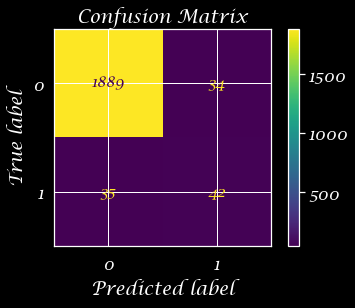

In [105]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

<font color="green" size=+2.5 face="Comic Sans MS"><div style="text-align: justify"> 3_ building the selected model  </font>

In [113]:
from sklearn.tree import DecisionTreeClassifier
# Define the DecisionTreeClassifier model with max_depth=6
dtc = DecisionTreeClassifier(max_depth=6)
# Train the model on the training data
dtc.fit(X_train, y_train)
# Make predictions on the testing data
dtc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
input_data = [[30.05000000000001, 32.4, 81.0, 9.300000000000011]]
predicted_class = dtc.predict(input_data)
print(predicted_class)
prediction = dtc.predict_proba(input_data)
# Display the probability of each class
pd.DataFrame(prediction,columns=['failure', 'no failure'])

[0]


failure  no failure
0  0.997905    0.002095

# .

<font color="RED" size=+3 face="Comic Sans MS"><div style="text-align: justify"> clustering :the best model construction  </font>

In [10]:
X_train,X_test,y_train,y_test =selectKBest(df)
X=pd.concat([X_train,X_test])
y=pd.concat([y_train,y_test])

['Air temperature [°C]', 'Torque [Nm]', 'Tool wear [min]', 'Temperature difference [°C]']


<font color="green" size=+1.5 face="Comic Sans MS"><div style="text-align: justify"> 1_ Build the model before balancing the data </font>

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; "> a_ kmeans : 🎄</span>

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

param_grid = {'n_clusters': range(2, 11)}
kmeans = KMeans()
grid_search = GridSearchCV(kmeans, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X)
print("Best hyperparameters: ", grid_search.best_params_)
best_kmeans = grid_search.best_estimator_
best_kmeans.fit(X)
labels = best_kmeans.labels_
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score: ", silhouette_avg)


Best hyperparameters:  {'n_clusters': 2}
Silhouette Score:  0.5943408126281483


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; "> b_ DBSCAN</span>

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score

scaled_data =X
eps_range = [0.1, 0.5, 1, 2, 5]   # Range of epsilon values to try
min_samples_range = [2, 5, 10, 20]   # Range of minimum samples values to try
best_score = -1
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)
        score = adjusted_rand_score(y, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples
            best_labels = labels

print("Adjusted Mutual Information Score:", adjusted_mutual_info_score(y, best_labels))
print("silhouette score:", silhouette_score(X, best_labels))

Adjusted Mutual Information Score: 0.2047759653141171
silhouette score: 0.19151757609681339


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; "> a_ let's try abanch of models now </span>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, MeanShift, AffinityPropagation
from sklearn.metrics import silhouette_score, adjusted_rand_score, completeness_score, homogeneity_score, mutual_info_score
from sklearn.model_selection import GridSearchCV

# Load data
data = X

# List of algorithms and their hyperparameters for hyperparameter tuning
algorithms = {
    'K-Means clustering': (KMeans(), {'n_clusters': [2, 3, 4, 5]}),
    'Hierarchical clustering': (AgglomerativeClustering(), {'n_clusters': [2, 3, 4, 5]}),
    'DBSCAN (Density-Based Spatial Clustering of Applications with Noise)': (DBSCAN(), {'eps': [0.1, 0.5, 1, 2], 'min_samples': [2, 5, 10, 20]}),
    'Mean Shift clustering': (MeanShift(), {'bandwidth': [0.1, 0.5, 1, 2]}),
    'Spectral clustering': (SpectralClustering(), {'n_clusters': [2, 3, 4, 5]}),
    'Affinity Propagation': (AffinityPropagation(), {'damping': [0.5, 0.7, 0.9]})
}

# Loop over algorithms and their hyperparameters
for algorithm, (model, param_grid) in algorithms.items():
    print(f"Algorithm: {algorithm}")
    
    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error')
    grid_search.fit(data)
    
    # Print the best parameters and evaluation metrics
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Silhouette Score: {silhouette_score(data, grid_search.best_estimator_.labels_)}")
    print(f"Adjusted Rand Score: {adjusted_rand_score(labels_true, grid_search.best_estimator_.labels_)}")
    print(f"Completeness Score: {completeness_score(labels_true, grid_search.best_estimator_.labels_)}")
    print(f"Homogeneity Score: {homogeneity_score(labels_true, grid_search.best_estimator_.labels_)}")
    print(f"Mutual Information: {mutual_info_score(labels_true, grid_search.best_estimator_.labels_)}\n")


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Model Buiding 📚</span>

In [106]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy
    ]
})

In [71]:
pd.set_option('precision',2)
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

OptionError: 'Pattern matched multiple keys'

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Result 📚</span>

In [ ]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })